In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import seaborn as sns

In [35]:
df = pd.read_csv('D:/3SEM/ML/Project/Autism.csv')
df.rename(columns={'austim':'autism'}, inplace=True)
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice autism  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [36]:
df.shape

(200, 21)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [38]:
#df['ethnicity'].value_counts()
df.drop(columns=['ethnicity','relation'])

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,contry_of_res,used_app_before,result,age_desc
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,yes,no,India,no,12.399055,18 and more
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,no,no,Mexico,no,6.551598,18 and more
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,yes,no,Egypt,no,3.180663,18 and more
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,no,no,India,no,2.220766,18 and more
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,no,no,Italy,no,7.252028,18 and more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,0,0,1,0,0,1,1,1,23.099434,m,no,no,Azerbaijan,no,-1.915659,18 and more
196,197,1,0,0,0,0,0,0,0,0,1,13.935726,m,no,no,India,no,0.520234,18 and more
197,198,1,0,0,0,0,0,1,0,1,1,22.760041,m,no,no,New Zealand,no,3.498948,18 and more
198,199,0,1,0,0,0,0,0,1,0,1,24.352584,f,no,no,United States,no,5.594550,18 and more


In [39]:
df['relation'].value_counts()

relation
Self                        180
Parent                        8
?                             6
Relative                      2
Others                        2
Health care professional      2
Name: count, dtype: int64

In [40]:
df['autism'].value_counts()

autism
no     171
yes     29
Name: count, dtype: int64

In [41]:
yes_rows = df[df['autism'] == 'yes']
oversampled_yes_rows = yes_rows.sample(n=2 * len(yes_rows), replace=True, random_state=42)
data = pd.concat([df, oversampled_yes_rows])
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [42]:
data['autism'].value_counts()

autism
no     171
yes     87
Name: count, dtype: int64

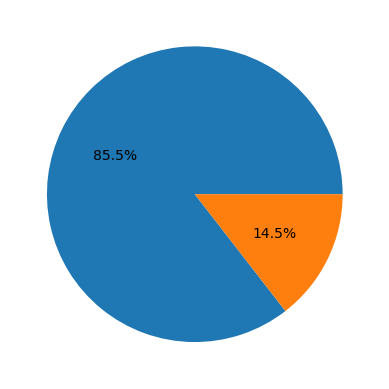

In [43]:
plt.pie(df['autism'].value_counts().values, autopct='%1.1f%%')
plt.show()

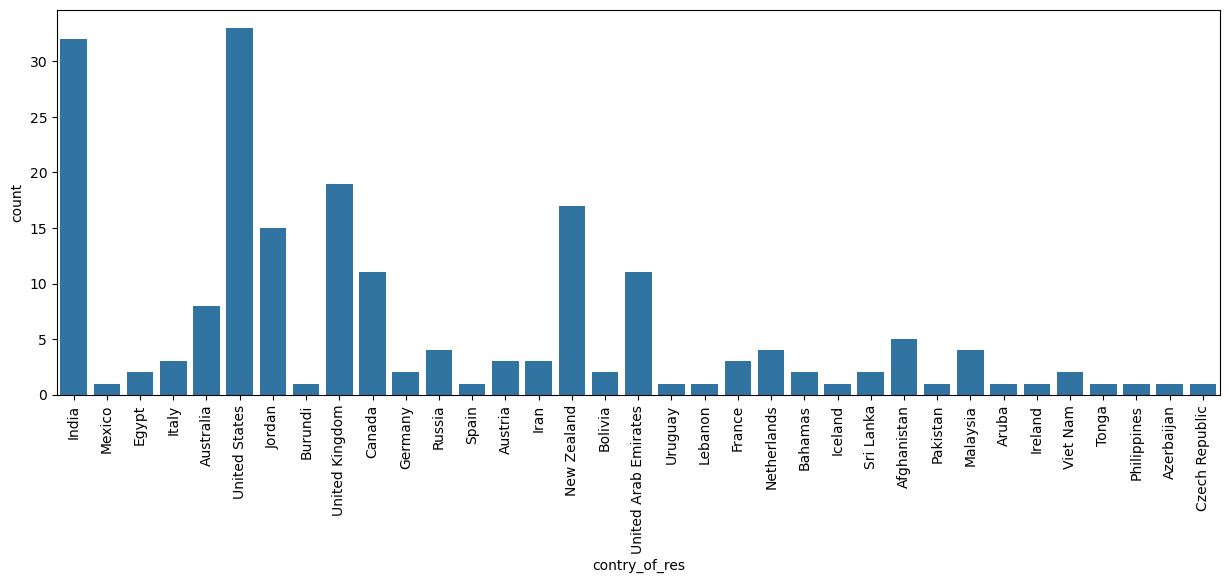

In [44]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res')
plt.xticks(rotation=90)
plt.show()


In [45]:
data = df.drop(['ID', 'age_desc', 'relation', 'contry_of_res'], axis=1)


In [46]:
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

In [47]:
X = data.drop('autism', axis=1)
y = data['autism']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print(confusion_matrix(y_test,y_pred))
#test_accuracy = calculate_accuracy(data)
#print(f"Validation Accuracy: {validation_accuracy:.2f}")

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        50
           1       0.00      0.00      0.00        10

    accuracy                           0.83        60
   macro avg       0.42      0.50      0.45        60
weighted avg       0.69      0.83      0.76        60

[[50  0]
 [10  0]]


In [54]:
# NAIVE BAYES

In [55]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87        50
           1       0.45      0.90      0.60        10

    accuracy                           0.80        60
   macro avg       0.71      0.84      0.73        60
weighted avg       0.89      0.80      0.82        60

[[39 11]
 [ 1  9]]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88        47
           1       0.67      0.15      0.25        13

    accuracy                           0.80        60
   macro avg       0.74      0.57      0.57        60
weighted avg       0.78      0.80      0.75        60

[[46  1]
 [11  2]]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [62]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [63]:
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.33      0.11      0.17         9

    accuracy                           0.83        60
   macro avg       0.60      0.54      0.54        60
weighted avg       0.78      0.83      0.80        60

[[49  2]
 [ 8  1]]
